<a href="https://colab.research.google.com/github/sahilf2001/ML-DL-Projects/blob/main/Rainfall_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [190]:
!pip install catboost

In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib

In [192]:
df = pd.read_csv("weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [193]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [195]:
df.shape

(145460, 23)

In [196]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


# **Handling Missing Values**

In [197]:
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [198]:
X = df.iloc[:,1:-1].values
Y = df.iloc[:,-1].values

In [199]:
df.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No


In [200]:
X[0]

array(['Albury', 13.4, 22.9, 0.6, nan, nan, 'W', 44.0, 'W', 'WNW', 20.0,
       24.0, 71.0, 22.0, 1007.7, 1007.1, 8.0, nan, 16.9, 21.8, 'No'],
      dtype=object)

In [201]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X = imputer.fit_transform(X)
Y = Y.reshape(-1,1)
Y = imputer.fit_transform(Y)

In [202]:
X[0]

array(['Albury', 13.4, 22.9, 0.6, 4.0, 0.0, 'W', 44.0, 'W', 'WNW', 20.0,
       24.0, 71.0, 22.0, 1007.7, 1007.1, 8.0, 7.0, 16.9, 21.8, 'No'],
      dtype=object)

In [203]:
Y

array([['No'],
       ['No'],
       ['No'],
       ...,
       ['No'],
       ['No'],
       ['No']], dtype=object)

# **Encoding the Variables**

In [204]:
from sklearn.preprocessing import LabelEncoder
# 0 6 8 9 
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])
X[:,6] = le.fit_transform(X[:,6])
X[:,8] = le.fit_transform(X[:,8])
X[:,9] = le.fit_transform(X[:,9])
X[:,-1] = le.fit_transform(X[:,-1])
Y[:,-1] = le.fit_transform(Y[:,-1])

In [205]:
X[0]

array([2, 13.4, 22.9, 0.6, 4.0, 0.0, 13, 44.0, 13, 14, 20.0, 24.0, 71.0,
       22.0, 1007.7, 1007.1, 8.0, 7.0, 16.9, 21.8, 0], dtype=object)

In [206]:
Y[0]

array([0], dtype=object)

In [207]:
Y = np.array(Y,dtype=float)
print(Y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


# **Feature Scaling**

In [208]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [209]:
print(X)

[[-1.53166617  0.19132753 -0.04135977 ... -0.01407077  0.02310362
  -0.52979545]
 [-1.53166617 -0.75105231  0.26874452 ...  0.03244663  0.387799
  -0.52979545]
 [-1.53166617  0.11279588  0.35331842 ...  0.62166712  0.22733303
  -0.52979545]
 ...
 [ 1.20928479 -1.06517892  0.52246622 ... -0.69632607  0.65037966
  -0.52979545]
 [ 1.20928479 -0.68822699  0.53656187 ... -0.29317521  0.63579185
  -0.52979545]
 [ 1.20928479  0.42692249 -0.45013361 ... -0.30868102 -0.10818671
  -0.52979545]]


# **Splitting the Dataset**

In [210]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [211]:
X_train.shape

(116368, 21)

In [212]:
Y_test.shape

(29092, 1)

# **Training the Model**

In [213]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
classifier = RandomForestClassifier(n_estimators=100,random_state=0)
classifier.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(random_state=0)

In [214]:
classifier.score(X_train,Y_train)

0.9999312525780283

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


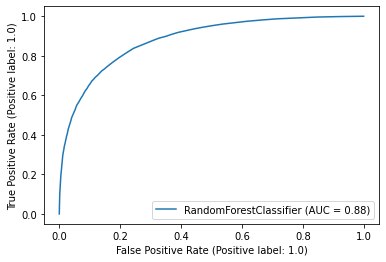

In [215]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import plot_roc_curve,roc_auc_score
plot_roc_curve(classifier, X_test,Y_test)

In [216]:
roc_auc_score(Y_test, y_pred, average=None)

0.7258878247103295

In [217]:
y_pred_inv = le.inverse_transform(np.array(classifier.predict(X_test),dtype=int))
Y_test_inv = le.inverse_transform(np.array(Y_test,dtype=int))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [218]:
y_pred_inv = y_pred_inv.reshape(-1,1)
Y_test_inv = Y_test_inv.reshape(-1,1)

In [219]:
dataf = np.concatenate((Y_test_inv,y_pred_inv),axis=1)
dataframe = pd.DataFrame(dataf,columns=['Rain on Tommorrow','Predition of Rain'])

In [220]:
print(dataframe)

      Rain on Tommorrow Predition of Rain
0                   Yes                No
1                   Yes               Yes
2                    No                No
3                    No               Yes
4                    No                No
...                 ...               ...
29087                No               Yes
29088                No                No
29089               Yes                No
29090                No                No
29091                No                No

[29092 rows x 2 columns]


In [221]:
from sklearn.metrics import accuracy_score
print("Accuracy of Random Forest:")
accuracy_score(Y_test,y_pred)

Accuracy of Random Forest:


0.8560085246803245

In [222]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[21755,   971],
       [ 3218,  3148]])

In [236]:
lor = LogisticRegression()
lor.fit(X_train, Y_train)
predictions = lor.predict(X_test)
print(classification_report(Y_test, predictions))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90     22726
         1.0       0.72      0.46      0.56      6366

    accuracy                           0.84     29092
   macro avg       0.79      0.70      0.73     29092
weighted avg       0.83      0.84      0.83     29092



In [237]:
lor.score(X_train,Y_train)

0.8412622026673999

In [238]:
print("Accuracy of Logistic Regression:")
accuracy_score(Y_test,predictions)

Accuracy of Logistic Regression:


0.8428090196617627

In [226]:
df.iloc[:,-1].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

Text(0, 0.5, 'Frequency')

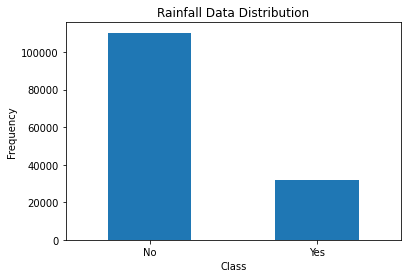

In [227]:
import matplotlib.pyplot as plt 
count_classes = pd.value_counts(df.iloc[:,-1], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Rainfall Data Distribution")

LABELS = ["No", "Yes"]

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

# **SMOTE**

In [228]:
import numpy as np 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from collections import Counter

In [229]:
from imblearn.over_sampling import SMOTE

counter = Counter(df.iloc[:,-1])
print('Before',counter)

smt = SMOTE()

X_train_sm, y_train_sm = smt.fit_resample(X_train, Y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({'No': 110316, 'Yes': 31877, nan: 3267})
After Counter({1.0: 90857, 0.0: 90857})


In [230]:
print("Before OverSampling, counts of label '1': {}".format(sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train == 0)))
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, Y_train)
 
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
 
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': [25511]
Before OverSampling, counts of label '0': [90857] 

After OverSampling, the shape of train_X: (181714, 21)
After OverSampling, the shape of train_y: (181714,) 

After OverSampling, counts of label '1': 90857
After OverSampling, counts of label '0': 90857


In [239]:
lr = LogisticRegression()
 
lr.fit(X_train_res, y_train_res)
 
predictions = lr.predict(X_test)
 
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.92      0.79      0.85     22726
         1.0       0.50      0.75      0.60      6366

    accuracy                           0.78     29092
   macro avg       0.71      0.77      0.73     29092
weighted avg       0.83      0.78      0.80     29092



In [232]:
accuracy_score(Y_test,predictions)

0.7836518630551355

In [240]:
lr.score(X_train_res,y_train_res)

0.776935183860352

In [233]:
clf = RandomForestClassifier(n_estimators=100,random_state=0)
clf.fit(X_train_res,y_train_res)
predict = clf.predict(X_test)
print(classification_report(Y_test,predict))

              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90     22726
         1.0       0.66      0.63      0.64      6366

    accuracy                           0.85     29092
   macro avg       0.78      0.77      0.77     29092
weighted avg       0.84      0.85      0.85     29092



In [234]:
accuracy_score(Y_test,predict)

0.847415096933865

In [235]:
clf.score(X_train_res,y_train_res)

0.9999449684669316